# Testing Data Preprocessing

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from geopy.distance import geodesic
from scipy import stats
from sklearn.cluster import KMeans


### Basic Data Exploration

In [31]:
data = pd.read_csv('test.csv')
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [4]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [5]:
data.shape

(625134, 9)

In [6]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
dtype: object

### Data Preprocessing

In [11]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [12]:
data['week_day'] = data.pickup_datetime.dt.strftime('%A')
data['week_day_num'] = data.pickup_datetime.dt.weekday
data['month'] = data.pickup_datetime.dt.month
data['pickup_hour'] = data.pickup_datetime.dt.hour

In [13]:
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,week_day,week_day_num,month,pickup_hour
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,Thursday,3,6,23
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,Thursday,3,6,23
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,Thursday,3,6,23
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,Thursday,3,6,23
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,Thursday,3,6,23


In [14]:
distance = []
for index in data['pickup_latitude'].index:
    distance.append(geodesic((data['pickup_latitude'].iloc[index], data['pickup_longitude'].iloc[index]), (data['dropoff_latitude'].iloc[index], data['dropoff_longitude'].iloc[index])).kilometers)

data['distance'] = distance

In [15]:
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,week_day,week_day_num,month,pickup_hour,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,Thursday,3,6,23,2.742863
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,Thursday,3,6,23,2.755774
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,Thursday,3,6,23,1.307112
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,Thursday,3,6,23,5.266978
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,Thursday,3,6,23,0.961745


In [17]:
data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,week_day,week_day_num,month,pickup_hour,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,Thursday,3,6,23,2.742863
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,Thursday,3,6,23,2.755774
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,Thursday,3,6,23,1.307112
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,Thursday,3,6,23,5.266978
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,Thursday,3,6,23,0.961745


In [ ]:
data.head()

In [19]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
week_day                      object
week_day_num                   int64
month                          int64
pickup_hour                    int64
distance                     float64
dtype: object

### Identifying the Outliers

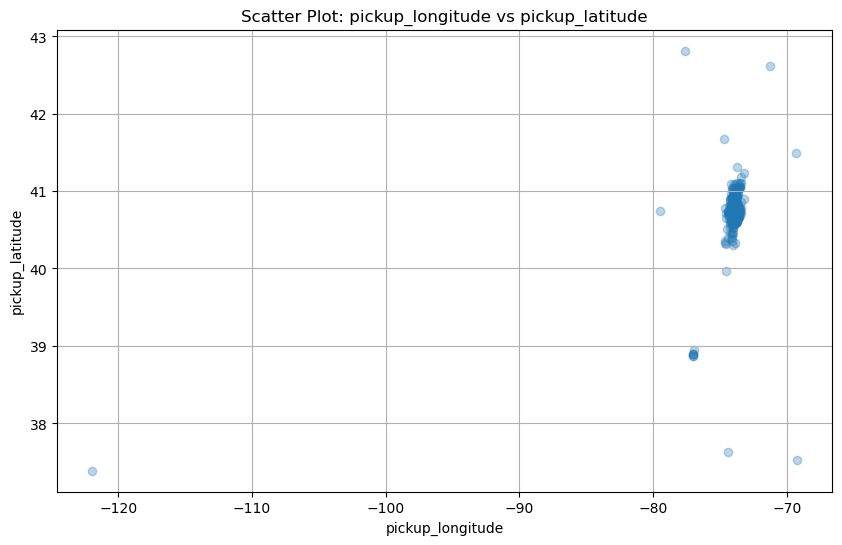

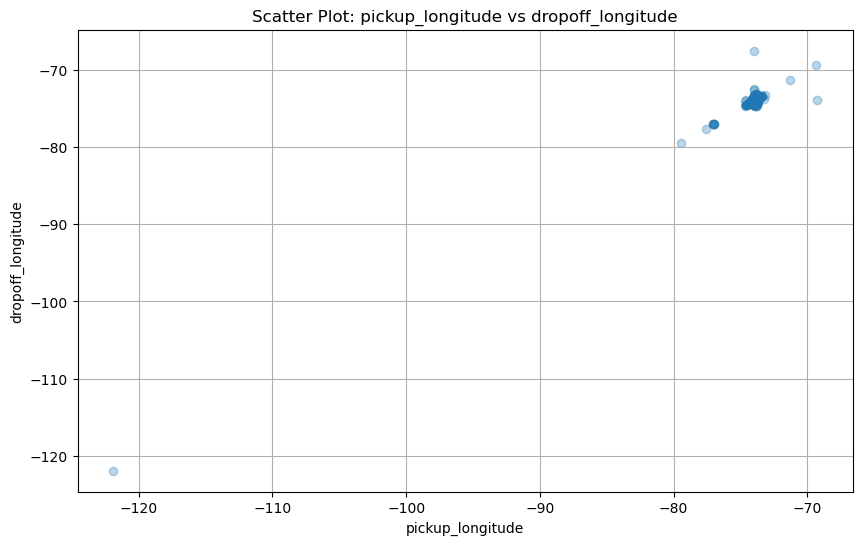

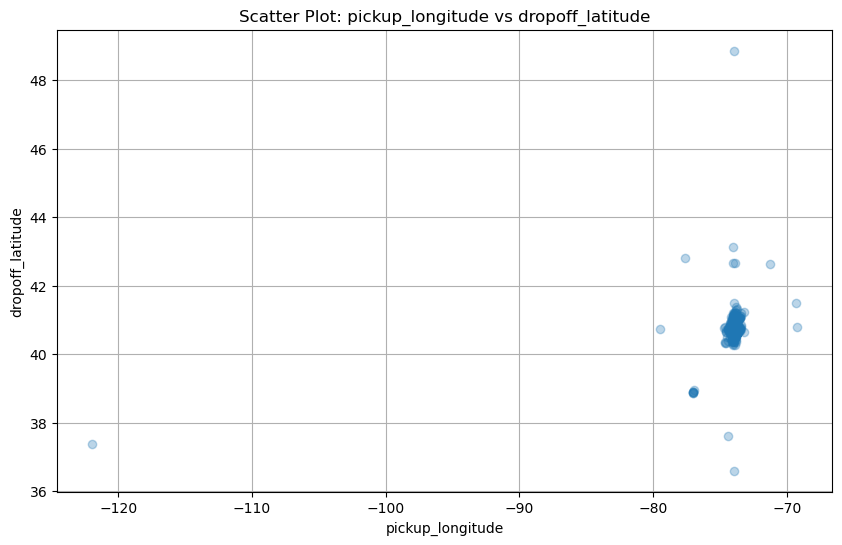

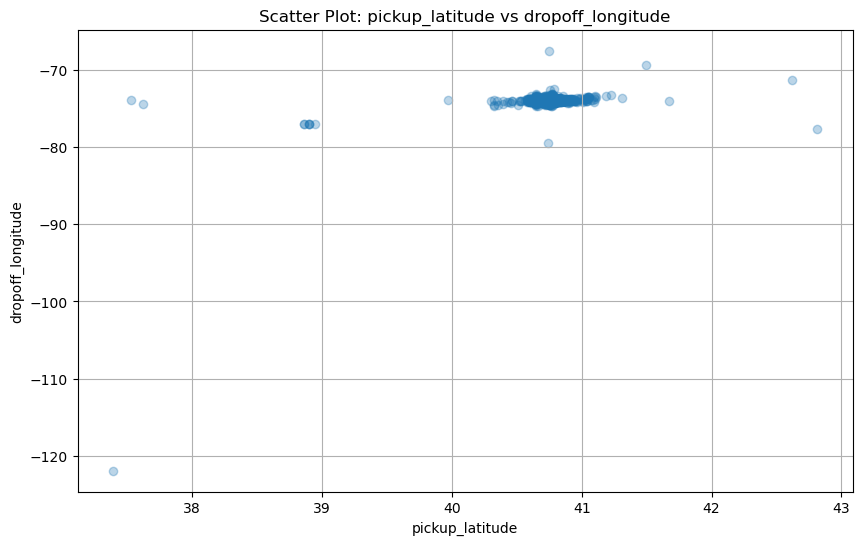

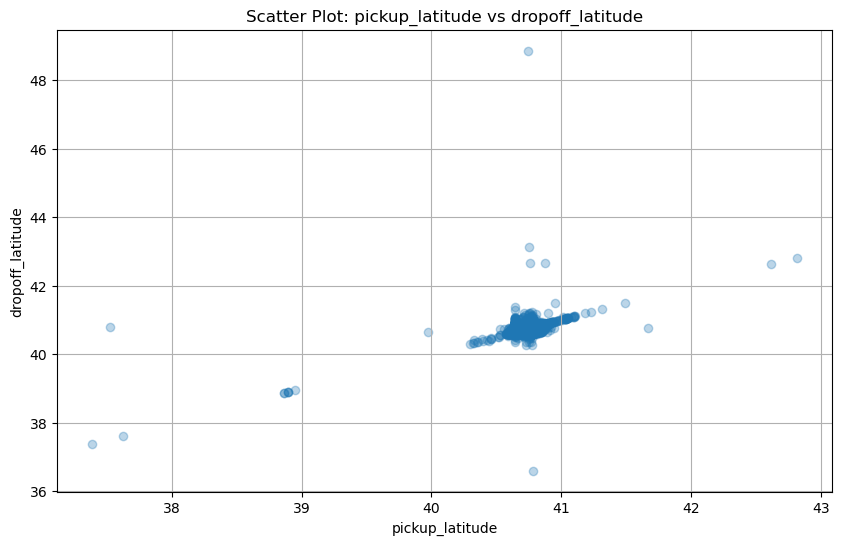

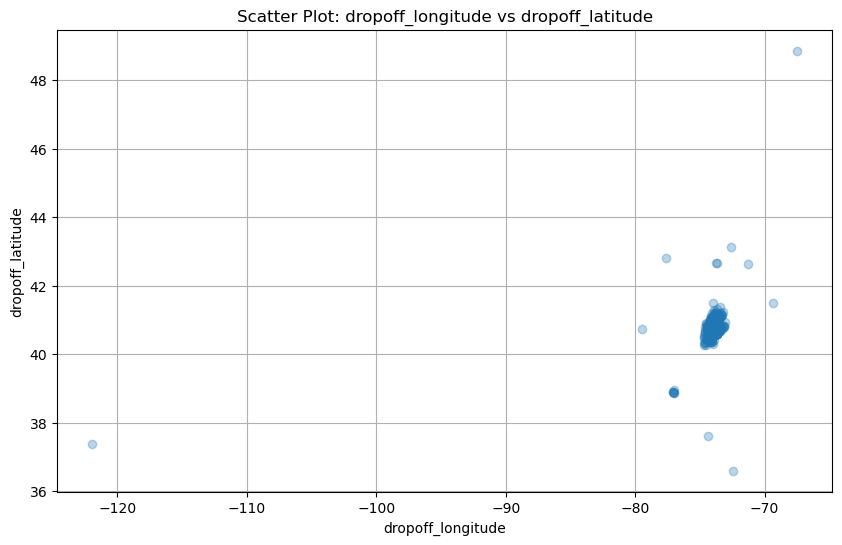

In [22]:
coordinate_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for i in range(len(coordinate_columns)):
    for j in range(i+1, len(coordinate_columns)):
        plt.figure(figsize=(10, 6))
        plt.scatter(data[coordinate_columns[i]], data[coordinate_columns[j]], marker='o', alpha=0.3)
        plt.xlabel(coordinate_columns[i])
        plt.ylabel(coordinate_columns[j])
        plt.title(f'Scatter Plot: {coordinate_columns[i]} vs {coordinate_columns[j]}')
        plt.grid()
        plt.show()

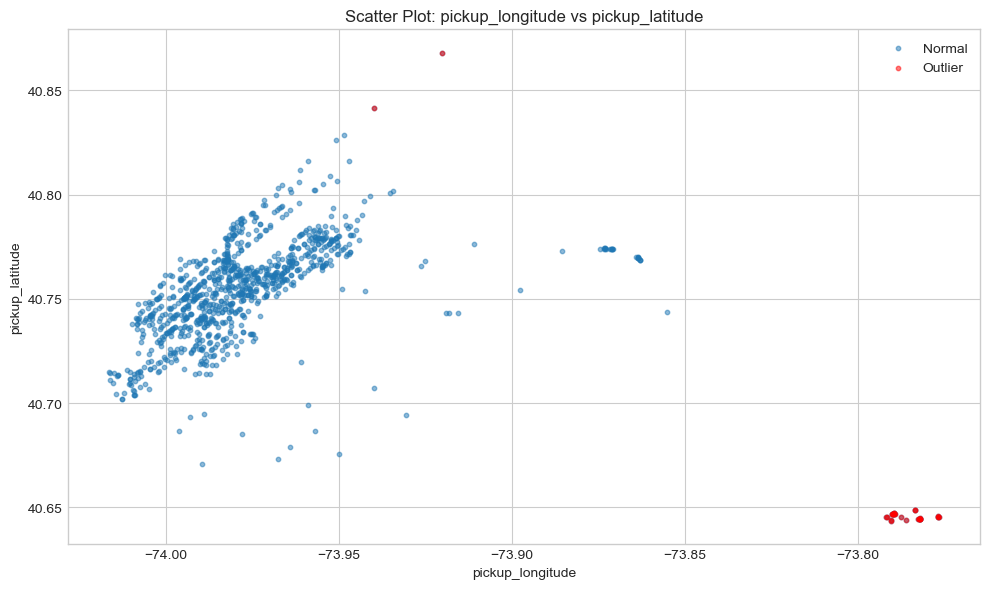

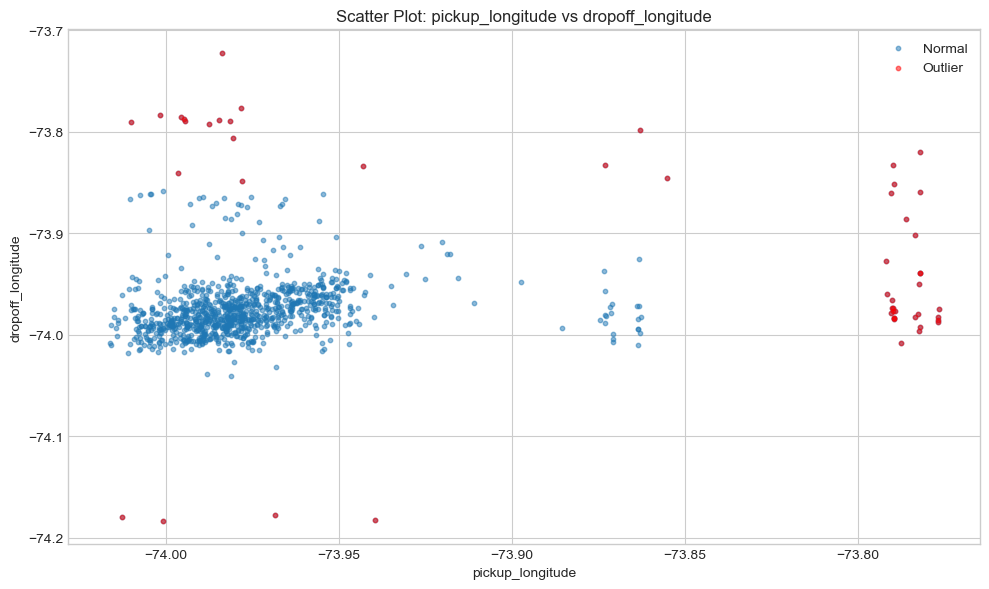

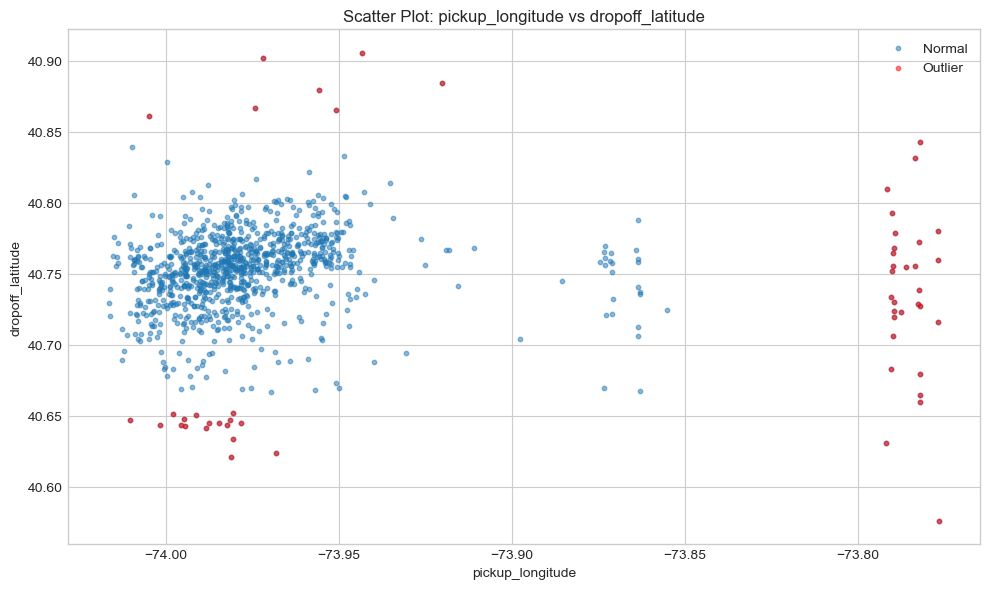

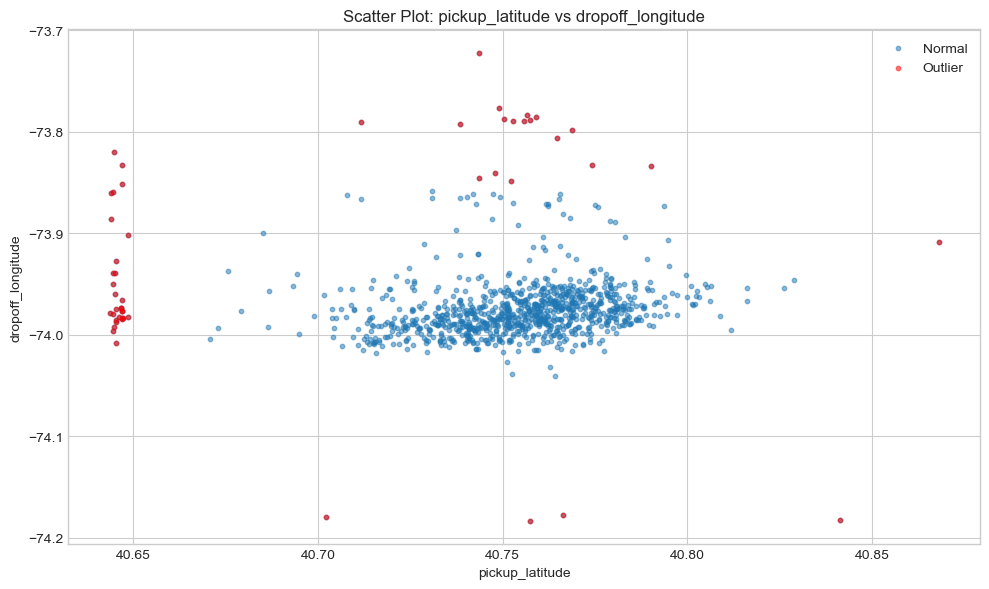

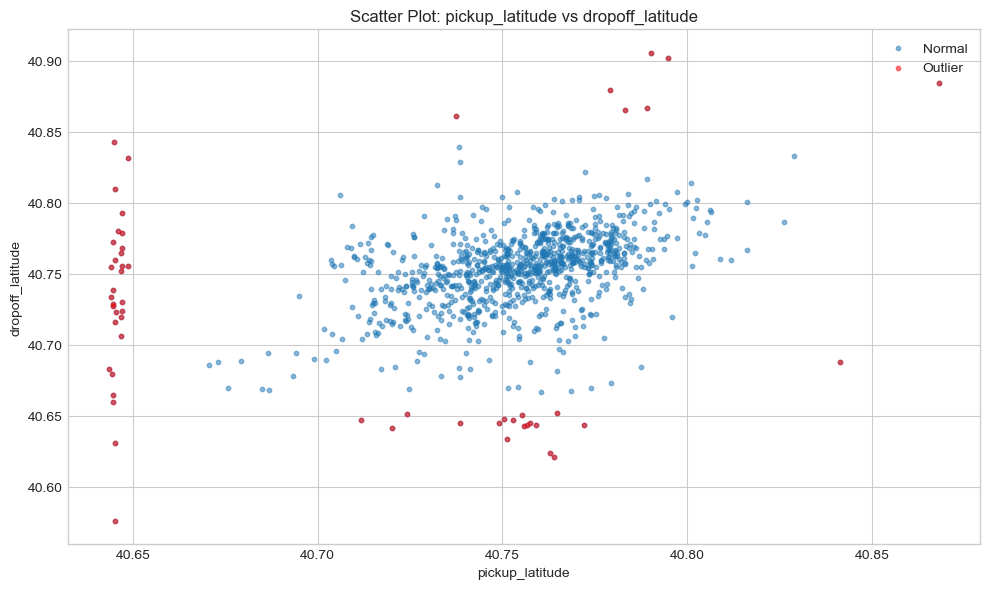

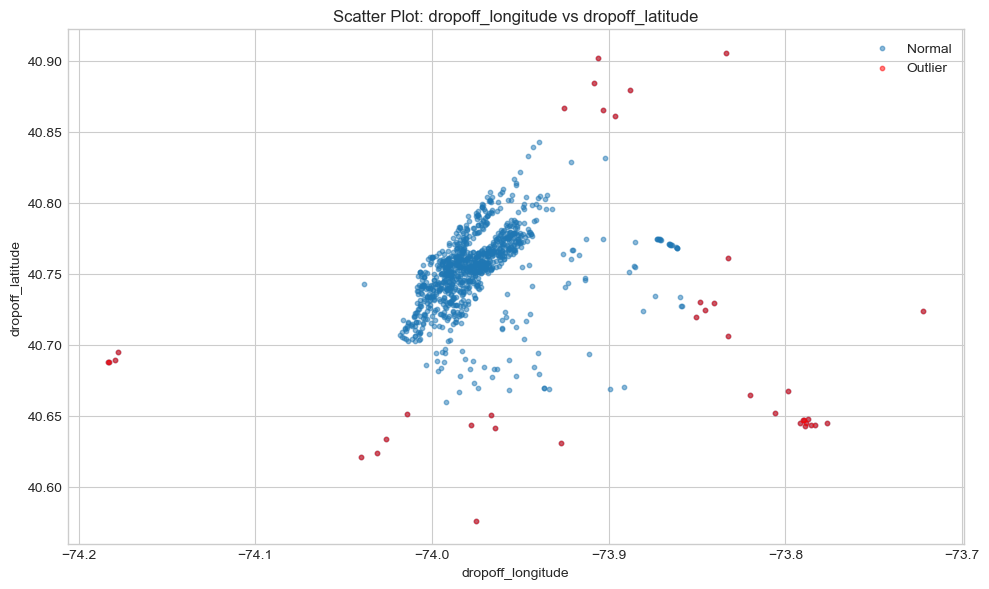

In [23]:
coordinate_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
plt.style.use('seaborn-whitegrid')
marker_size = 10
alpha = 0.5
z_threshold = 3
sample_size = 1000
sample_data = data.sample(sample_size)
for i in range(len(coordinate_columns)):
    for j in range(i+1, len(coordinate_columns)):
        plt.figure(figsize=(10, 6))
        plt.scatter(sample_data[coordinate_columns[i]], sample_data[coordinate_columns[j]], marker='o', s=marker_size, alpha=alpha, label='Normal')
        z_scores_i = sample_data[coordinate_columns[i]].apply(lambda x: (x - sample_data[coordinate_columns[i]].mean()) / sample_data[coordinate_columns[i]].std())
        z_scores_j = sample_data[coordinate_columns[j]].apply(lambda x: (x - sample_data[coordinate_columns[j]].mean()) / sample_data[coordinate_columns[j]].std())
        outliers = sample_data[(abs(z_scores_i) > z_threshold) | (abs(z_scores_j) > z_threshold)]
        plt.scatter(outliers[coordinate_columns[i]], outliers[coordinate_columns[j]], marker='o', s=marker_size, alpha=alpha, color='red', label='Outlier')
        plt.xlabel(coordinate_columns[i])
        plt.ylabel(coordinate_columns[j])
        plt.title(f'Scatter Plot: {coordinate_columns[i]} vs {coordinate_columns[j]}')
        plt.legend()
        plt.tight_layout()
        plt.show()


In [24]:
coordinate_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
z_threshold = 3
z_scores = {}
for column in coordinate_columns:
    z_scores[column] = stats.zscore(data[column])
coordinate_ranges = {}
for column in coordinate_columns:
    lower_bound = data[column][z_scores[column] <= z_threshold].min()
    upper_bound = data[column][z_scores[column] <= z_threshold].max()
    coordinate_ranges[column] = (lower_bound, upper_bound)
coordinate_ranges

{'pickup_longitude': (-121.9331283569336, -73.75469207763672),
 'pickup_latitude': (37.38958740234375, 40.84046173095703),
 'dropoff_longitude': (-121.9333267211914, -73.75578308105469),
 'dropoff_latitude': (36.601322174072266, 40.85926055908203)}

In [25]:
data.shape

(625134, 14)

In [26]:
data.to_csv('test_preprocessed.csv', index = False)

In [27]:
preprocessed_data = pd.read_csv('test_preprocessed.csv')
preprocessed_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,week_day,week_day_num,month,pickup_hour,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,Thursday,3,6,23,2.742863
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,Thursday,3,6,23,2.755774
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,Thursday,3,6,23,1.307112
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,Thursday,3,6,23,5.266978
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,Thursday,3,6,23,0.961745


In [28]:
preprocessed_data.shape

(625134, 14)

In [29]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
week_day                      object
week_day_num                   int64
month                          int64
pickup_hour                    int64
distance                     float64
dtype: object

In [30]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,week_day_num,month,pickup_hour,distance
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816,3.047670,3.521874,13.610228,3.434731
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824,1.953951,1.680049,6.394761,4.275652
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000,1.000000,2.000000,9.000000,1.232226
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543,3.000000,4.000000,14.000000,2.094115
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852,5.000000,5.000000,19.000000,3.881398
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597,6.000000,6.000000,23.000000,1036.269715
